In [1]:
import pandas as pd
import numpy as np

In [23]:
pd.read_csv('retail/oil.csv', header=None).head(3)

,0,1
0,date,dcoilwtico
1,2013-01-01,NaN
2,2013-01-02,93.14


In [22]:
columns = ['Date','Oil Price']
pd.read_csv(
    'retail/oil.csv',
    header=0,
    names=columns
).head(3)


,Date,Oil Price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97


In [25]:
oil = pd.read_csv(
    'retail/oil.csv',
    header=0,
    names=columns,
    index_col='Date'
).head(3)

In [26]:
oil.index.dtype

dtype('O')

In [33]:
oil = pd.read_csv(
    'retail/oil.csv',
    header=0,
    names=columns,
    index_col='Date',
    parse_dates=True
).head(10)

In [29]:
oil.index.dtype


dtype('<M8[ns]')

In [32]:
pd.read_csv(
    'retail/retail_2016_2017.csv',
    usecols=['date','store_nbr']
)

,date,store_nbr
0,2016-01-01,1
1,2016-01-01,1
2,2016-01-01,1
3,2016-01-01,1
4,2016-01-01,1
...,...,...
1054939,2017-08-15,9
1054940,2017-08-15,9
1054941,2017-08-15,9
1054942,2017-08-15,9


In [36]:
pd.read_csv(
    'retail/oil.csv',
    header=0,
    names=columns,
    index_col='Date',
    parse_dates=True,
    skiprows=[0],
    nrows=3
).head(10)

,Oil Price
Date,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12


In [39]:
pd.read_csv(
    'retail/oil.csv',
    header=0,
    names=columns,
    index_col='Date',
    parse_dates=True,
    na_values= '93.14'
).head(10)

,Oil Price
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
2013-01-08,93.21
2013-01-09,93.08
2013-01-10,93.81
2013-01-11,93.60


In [43]:
string_slice = lambda x: int(x[-2])

pd.read_csv(
    'retail/oil.csv',
    header=0,
    names=columns,
    converters={'Date': string_slice}
).head(10)

,Date,Oil Price
0,0,NaN
1,0,93.14
2,0,92.97
3,0,93.12
4,0,93.20
5,0,93.21
6,0,93.08
7,1,93.81
8,1,93.60
9,1,94.27


In [47]:
pd.read_excel(
    'project_data/premier_league_games.xlsx',
    sheet_name=0
).head()

,id,league_name,season,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,1729,England Premier League,2008/2009,Manchester United,Newcastle United,1,1
1,1730,England Premier League,2008/2009,Arsenal,West Bromwich Albion,1,0
2,1731,England Premier League,2008/2009,Sunderland,Liverpool,0,1
3,1732,England Premier League,2008/2009,West Ham United,Wigan Athletic,2,1
4,1733,England Premier League,2008/2009,Aston Villa,Manchester City,4,2


In [49]:
pd.concat(
    pd.read_excel(
    'project_data/premier_league_games.xlsx',
    sheet_name=None,
    ),
    ignore_index=True
)

,id,league_name,season,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,1729,England Premier League,2008/2009,Manchester United,Newcastle United,1,1
1,1730,England Premier League,2008/2009,Arsenal,West Bromwich Albion,1,0
2,1731,England Premier League,2008/2009,Sunderland,Liverpool,0,1
3,1732,England Premier League,2008/2009,West Ham United,Wigan Athletic,2,1
4,1733,England Premier League,2008/2009,Aston Villa,Manchester City,4,2
...,...,...,...,...,...,...,...
3035,4764,England Premier League,2015/2016,Southampton,Leicester City,2,2
3036,4765,England Premier League,2015/2016,Swansea City,Stoke City,0,1
3037,4766,England Premier League,2015/2016,Tottenham Hotspur,Liverpool,0,0
3038,4767,England Premier League,2015/2016,Watford,Arsenal,0,3


In [71]:
oil_agg = oil.reset_index().groupby(oil.reset_index()['Date'].dt.day).agg({
    'Oil Price': 'sum'
})

In [73]:
oil_agg.to_csv('retail/oil_agg.csv')

In [74]:
oil_agg.to_excel(
    'retail/oil_agg.xlsx',
    sheet_name='Oil Agg'
)

In [75]:
with pd.ExcelWriter('retail/oil_agg.xlsx') as writer:
    oil_agg.to_excel(writer, sheet_name='Oil Agg')

In [79]:
url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'

gpd_data = pd.read_html(url)[1]

In [88]:
gpd_data_leaned = gpd_data.droplevel(level=0,axis=1).rename(columns={
    'Flag, name and postal abbreviation[8]': 'State',
    'Population (2020)[10]': 'Population'
}).loc[:,['State','Population']]

<Axes: xlabel='State'>

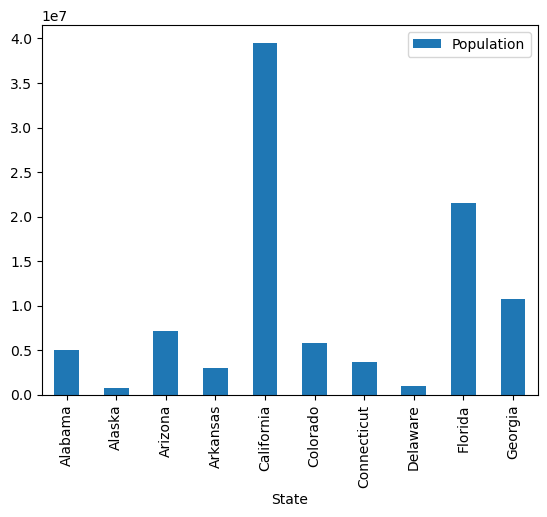

In [93]:
gpd_data_leaned.head(10).set_index('State').plot.bar()